# Project:  Boston AirBNB Data Analysis
Adel Abu Hashim - July 2021

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#clean">Data Cleaning</a></li>  
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


>In this project; I used Boston AirBNB Data from kaggle. 
>This dataset can be used to understand how much AirBNB homes are earning in certain time frames. 

>***Quetions***
1. Q1: 
2. Q2: 


In [1]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import helpers
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
# load data int DataFrames
reviews_df = pd.read_csv('data/reviews.csv')
listings_df = pd.read_csv('data/listings.csv')
calendar_df = pd.read_csv('data/calendar.csv')

<a id='wrangling'></a>
## Data Wrangling

>### General Properties 

>> ### Calendar Data

In [3]:
#print the first row of df
calendar_df.head(1)

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN


In [4]:
#print df's statiscs
calendar_df.describe()

,listing_id
count,1.308890e+06
mean,8.442118e+06
std,4.500149e+06
min,3.353000e+03
25%,4.679319e+06
50%,8.578710e+06
75%,1.279603e+07
max,1.493346e+07


In [5]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [6]:
calendar_df.shape

(1308890, 4)

>> ### Listings Data

In [7]:
#print the first row of df
listings_df.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN


In [8]:
#print df's statiscs
listings_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [9]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [10]:
listings_df.shape

(3585, 95)

>> ### Reviews Data

In [11]:
#print the first row of df
reviews_df.head(1)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...


In [12]:
#print df's statiscs
reviews_df.describe()

,listing_id,id,reviewer_id
count,6.827500e+04,6.827500e+04,6.827500e+04
mean,4.759910e+06,5.246516e+07,2.802389e+07
std,3.788990e+06,2.790991e+07,2.234097e+07
min,3.353000e+03,1.021000e+03,1.430000e+02
25%,1.458081e+06,3.010420e+07,9.001346e+06
50%,4.080000e+06,5.223121e+07,2.305179e+07
75%,7.377034e+06,7.663248e+07,4.213454e+07
max,1.484378e+07,9.999045e+07,9.335034e+07


In [13]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [14]:
reviews_df.shape

(68275, 6)

<a id='clean'></a>
# Data Cleaning

<ul>
<li><a href="#cal">Calendar Data</a></li>
<li><a href="#list">Listings Data</a></li>
<li><a href="#rev">Reviews Data</a></li>  
</ul>

In [15]:
##### make a copies from 3 data sets to be cleaned
calendar_df_cleaned = calendar_df.copy()
listings_df_cleaned = listings_df.copy()
reviews_df_cleaned = reviews_df.copy()

<a id='cal'></a>
>> ### Calendar Data

>>> ### Fixing data types

In [16]:
calendar_df.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [17]:
helpers.object_dtype(calendar_df)

date <class 'str'>
available <class 'str'>
price <class 'float'>


#### 1. date column

##### date is string?! it should be fixed for sure!

In [18]:
# format of the data
calendar_df.date[0]

'2017-09-05'

In [19]:
# differntiate between months and days
calendar_df.head(5)

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [20]:
calendar_df_cleaned['date'] = pd.to_datetime(calendar_df['date'], format='%Y-%m-%d')

In [21]:
type(calendar_df_cleaned['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

##### fixed now

In [22]:
helpers.object_dtype(calendar_df_cleaned)

available <class 'str'>
price <class 'float'>


#### 2. avaliable column

In [23]:
calendar_df['available'].unique()

array(['f', 't'], dtype=object)

In [24]:
calendar_df_cleaned['available'] == 'f'

0          True
1          True
2          True
3          True
4          True
           ... 
1308885    True
1308886    True
1308887    True
1308888    True
1308889    True
Name: available, Length: 1308890, dtype: bool

##### it seems to be fasle and true, so it should be converted to bool not str. True will be 1 adn False will be 0 to be easier for using 

In [25]:
# f-->0, t-->1 
calendar_df_cleaned['available'] = np.where(calendar_df_cleaned['available'] == 'f', 0, 1)

In [26]:
# validate the fixing 
calendar_df_cleaned['available'].unique()

array([0, 1])

##### fixed now

#### 2. price column

In [27]:
#calendar unique value
calendar_df_cleaned['price'].unique()

array([nan, '$65.00', '$75.00', ..., '$1,030.00', '$2,895.00', '$11.00'],
      dtype=object)

In [28]:
# check the typ of each indidual value which will be used in processes
type(pd.DataFrame(calendar_df_cleaned['price'].dropna()).head(1)['price'][365])

str

##### str!! the dollar sign is a problem, aslo the commas!

In [29]:
calendar_df_cleaned['price'] = calendar_df_cleaned['price'].str.replace(',', '').str.replace('$', '').astype(float)

In [30]:
calendar_df_cleaned['price'].unique()

array([  nan,   65.,   75., ..., 1030., 2895.,   11.])

In [31]:
type(pd.DataFrame(calendar_df_cleaned['price'].dropna()).head(1)['price'][365])

numpy.float64

##### fixed now

In [32]:
calendar_df_cleaned.head(5)

,listing_id,date,available,price
0,12147973,2017-09-05,0,NaN
1,12147973,2017-09-04,0,NaN
2,12147973,2017-09-03,0,NaN
3,12147973,2017-09-02,0,NaN
4,12147973,2017-09-01,0,NaN


In [33]:
helpers.object_dtype(calendar_df_cleaned)

No complex data types :)


<a id='list'></a>
>> ### Listings Data

In [34]:
listings_df_cleaned.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN


In [35]:
pd.get_option("display.max_columns")

20

In [36]:
# setting display to none to show all data frame columns
pd.set_option("display.max_columns", None)

In [37]:
listings_df_cleaned.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [38]:
listings_df_cleaned.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [39]:
columns_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'thumbnail_url', 'medium_url', 'picture_url', 'space'
                   , 'experiences_offered', 'neighborhood_overview', 'note', 'transit', 'access', 'interaction',
                   'house_rules',
                   'xl_picture_url','host_has_profile_pic', 'host_identity_verified', 'street',
                   'neighbourhood', 'neighbourhood_cleansed','neighbourhood_group_cleansed',]

>>> ### Drop extraneous columns

>>> ### Fixing data types

In [40]:
listings_df.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 95, dtype: object

<a id='rev'></a>
>> ### Reviews Data

In [41]:
reviews_df_cleaned.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

>>> ### Fixing data types

In [42]:
reviews_df_cleaned.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

In [43]:
helpers.object_dtype(reviews_df_cleaned)

date <class 'str'>
reviewer_name <class 'str'>
comments <class 'str'>


#### 1. date column

In [44]:
# format of the data
reviews_df_cleaned.date[0]

'2013-05-21'

In [45]:
# differntiate between months and days
reviews_df_cleaned.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [46]:
reviews_df_cleaned['date'] = pd.to_datetime(reviews_df_cleaned['date'], format='%Y-%m-%d')

In [47]:
type(reviews_df_cleaned['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

##### fixed now

In [48]:
helpers.object_dtype(reviews_df_cleaned)

reviewer_name <class 'str'>
comments <class 'str'>


>>> ### Drop extraneous columns
Comments column is not useful in this project, but in another projects related to NLP maybe used..

In [49]:
#drop comments column
reviews_df_cleaned.drop(columns=['comments'], inplace=True)

In [50]:
reviews_df_cleaned.head(1)

,listing_id,id,date,reviewer_id,reviewer_name
0,1178162,4724140,2013-05-21,4298113,Olivier


In [51]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


<a id='eda'></a>
## Exploratory Data Analysis


In [52]:
calendar_df_cleaned.head(1)

,listing_id,date,available,price
0,12147973,2017-09-05,0,NaN


In [53]:
listings_df_cleaned.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN


In [54]:
reviews_df_cleaned.head(1)

,listing_id,id,date,reviewer_id,reviewer_name
0,1178162,4724140,2013-05-21,4298113,Olivier


In [55]:
def get_range_and_azimuth_from_vec_xy(center_x, center_y, target_x, target_y):
    # Note: this returns things in the screen space!
    direction = np.array([target_x, target_y]) - np.array([center_x, center_y])
    rng = np.sqrt(np.sum(direction ** 2))
    return rng


In [56]:
get_range_and_azimuth_from_vec_xy(0, 0, -3, -4)

5.0

In [57]:
direction = np.array([1, 2]) - np.array([3, 4])

In [58]:
direction

array([-2, -2])

In [59]:
(np.sum(direction ** 2))

8

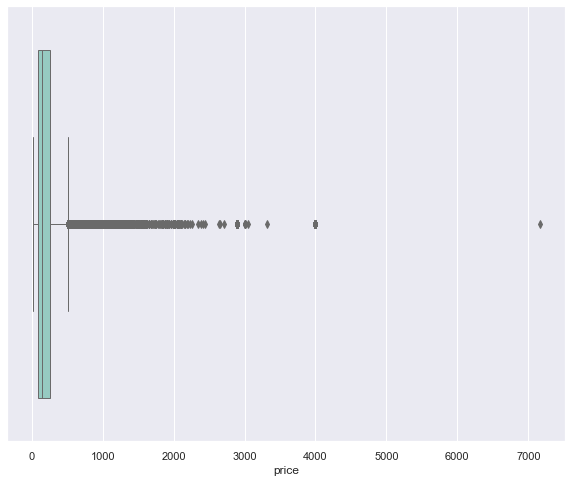

In [73]:



sns.set(rc={'figure.figsize':(10,8)})
ax = sns.boxplot(x=calendar_df_cleaned['price'], palette="Set3", linewidth=1, orient="v", )

##### I will divide prices into three categories, 
- high > 2000  -->2
- medium 500:2000 --->1
- low < 500 ---> 0

In [100]:
calendar_df_cleaned['price_case'] = np.where(calendar_df_cleaned['price'] > 300, 2,
                                            np.where(calendar_df_cleaned['price'] < 100, 0,1))

In [101]:
calendar_df_cleaned.head(1)

,listing_id,date,available,price,price_case
0,12147973,2017-09-05,0,NaN,1


In [102]:
calendar_df_cleaned.dropna().sort_values(by='price')

,listing_id,date,available,price,price_case
1266231,12736032,2017-06-18,1,11.0,0
1266271,12736032,2017-05-09,1,11.0,0
323780,14855404,2017-07-29,1,20.0,0
172051,14867747,2017-03-26,1,20.0,0
172050,14867747,2017-03-27,1,20.0,0
...,...,...,...,...,...
834428,12972378,2017-07-29,1,4000.0,2
834427,12972378,2017-07-30,1,4000.0,2
834433,12972378,2017-07-24,1,4000.0,2
834548,12972378,2017-03-11,1,4000.0,2


<AxesSubplot:>

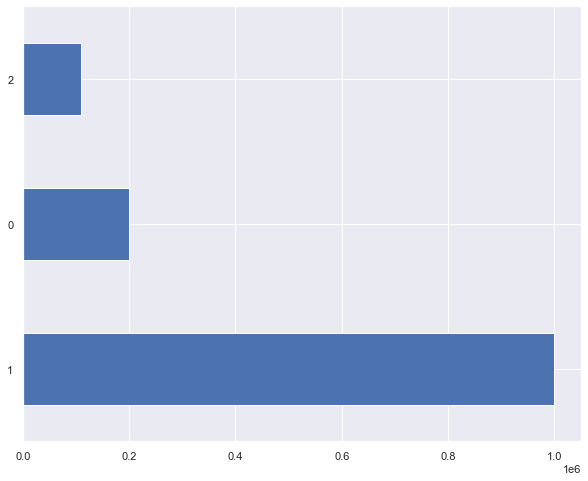

In [105]:
calendar_df_cleaned.price_case.value_counts().plot(kind='barh')